<a href="https://colab.research.google.com/github/AlaricAI/Portfolio.AI/blob/main/5_Amaliyot_tasvirlarda_obyektni_aniqlash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# CIFAR-10 datasetini yuklash
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Tasvirlarning o'lchamlari va sinflari haqida ma'lumot olish
print(f"Train data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test labels shape: (10000, 1)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3607 - loss: 1.7517 - val_accuracy: 0.5620 - val_loss: 1.2541
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5757 - loss: 1.2105 - val_accuracy: 0.5766 - val_loss: 1.2027
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6350 - loss: 1.0426 - val_accuracy: 0.6352 - val_loss: 1.0609
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6679 - loss: 0.9542 - val_accuracy: 0.6624 - val_loss: 0.9787
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6909 - loss: 0.8900 - val_accuracy: 0.6773 - val_loss: 0.9502
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7157 - loss: 0.8196 - val_accuracy: 0.6767 - val_loss: 0.9439
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7327 - loss: 0.7717 - val_accuracy: 0.6774 - val_loss: 0.9350
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7462 - loss: 0.7314 - val_accuracy: 0.

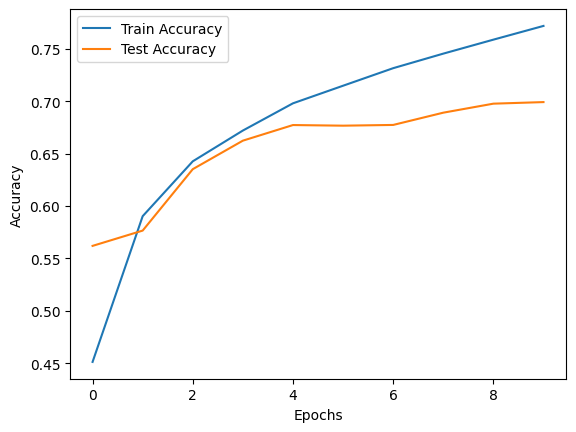

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# CIFAR-10 datasetini yuklash
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Tasvirlarni [0, 1] oraliqqa normallashtirish
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Modelni yaratish
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 ta sinf
])

# Modelni kompilyatsiya qilish
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modelni o'qitish
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Modelni test to'plamida baholash
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# Natijalarni vizualizatsiya qilish
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6985 - loss: 0.9066
Test loss: 0.9093272686004639
Test accuracy: 0.6991999745368958


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


<ipython-input-7-8edccf2c00ab>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Asl: {class_names[int(sample_labels[i])]}\n"


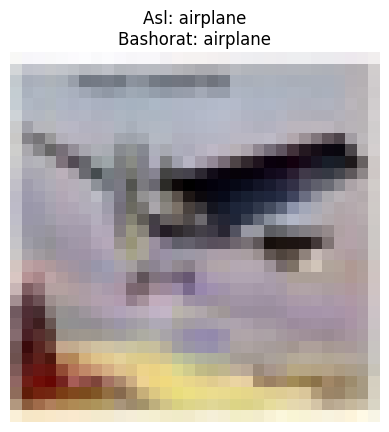

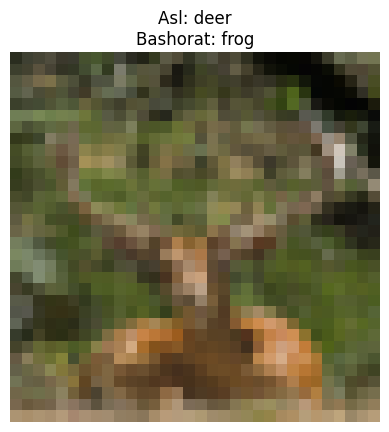

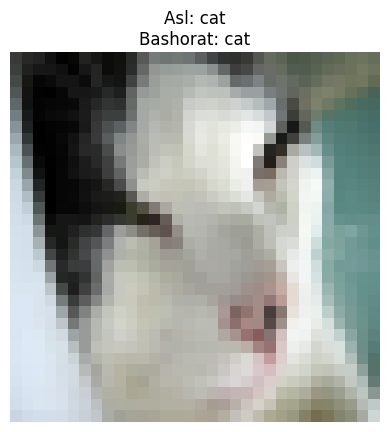

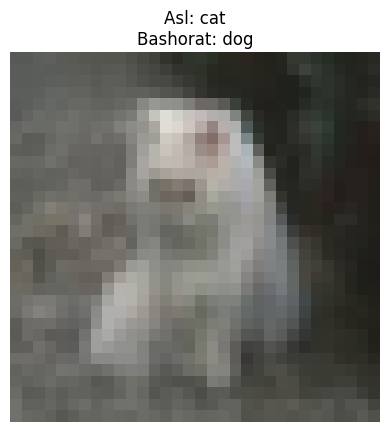

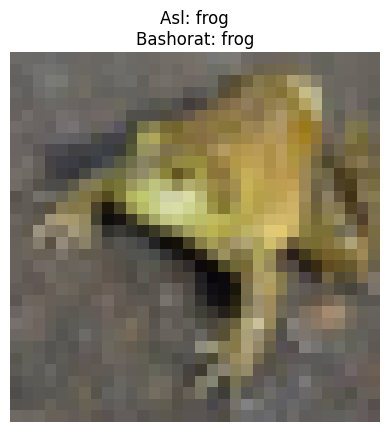

In [7]:
import numpy as np
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Tasodifiy 5 ta test tasvirni bashorat qilamiz
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

predictions = model.predict(sample_images)

for i in range(num_images):
    plt.imshow(sample_images[i])
    plt.title(f"Asl: {class_names[int(sample_labels[i])]}\n"
              f"Bashorat: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()


In [8]:
from google.colab import files
uploaded = files.upload()

Saving download.webp to download.webp


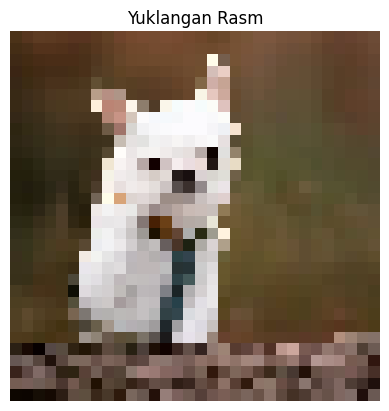

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Yuklangan fayl nomini olish
import os
filename = list(uploaded.keys())[0]

# Rasmni o'qish va 32x32 ga o'lchamini moslashtirish
img = image.load_img(filename, target_size=(32, 32))
plt.imshow(img)
plt.title("Yuklangan Rasm")
plt.axis("off")
plt.show()

# Rasmni numpy arrayga aylantirish
img_array = image.img_to_array(img)

# [0, 1] oraliqqa normallashtirish
img_array = img_array.astype('float32') / 255.0

# CNN modeli uchun 4D tensor (1, 32, 32, 3) kerak
img_array = np.expand_dims(img_array, axis=0)


In [10]:
pred = model.predict(img_array)
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predicted_class = class_names[np.argmax(pred)]
print(f"Modelning bashorati: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Modelning bashorati: dog


In [11]:
model.save("cifar10_model.h5")